# Time series

In [6]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
np.set_printoptions(precision=4, suppress=True)

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

## Date and time data types and tools

In [7]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2021, 4, 22, 19, 51, 2, 789010)

In [8]:
now.year, now.month, now.day

(2021, 4, 22)

In [9]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days)
delta.seconds

926 days, 15:45:00
926


56700

In [10]:
from datetime import timedelta
start = datetime(2011, 1, 7)
print(start + timedelta(12))
print(start - 2 * timedelta(12))

2011-01-19 00:00:00
2010-12-14 00:00:00


### Converting between String and Datetime

In [11]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
stamp.strftime('%Y-%m-%d')


2011-01-03 00:00:00


'2011-01-03'

In [7]:
stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [8]:
value = '2011-01-03'
print(datetime.strptime(value, '%Y-%m-%d'))
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

2011-01-03 00:00:00


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [9]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [10]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [11]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [12]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

## Time series basics

In [14]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -1.260509
2011-01-05    0.936326
2011-01-07    0.458334
2011-01-08   -0.544982
2011-01-10   -0.855036
2011-01-12   -0.178058
dtype: float64

In [15]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [16]:
ts + ts[::2]

2011-01-02   -2.521017
2011-01-05         NaN
2011-01-07    0.916669
2011-01-08         NaN
2011-01-10   -1.710071
2011-01-12         NaN
dtype: float64

In [17]:
ts.index.dtype

dtype('<M8[ns]')

In [18]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

In [19]:
stamp = ts.index[2]
ts[stamp]

0.4583342816904662

In [20]:
print(ts['1/10/2011'])
print(ts['20110110'])

-0.8550355708935079
-0.8550355708935079


In [21]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.215046
2000-01-02    1.530596
2000-01-03    0.064554
2000-01-04    1.036593
2000-01-05   -1.070101
                ...   
2002-09-22    0.487590
2002-09-23   -0.580649
2002-09-24   -1.479498
2002-09-25   -1.081108
2002-09-26    0.768848
Freq: D, Length: 1000, dtype: float64

In [22]:
longer_ts['2001']

2001-01-01    0.067334
2001-01-02    2.007366
2001-01-03   -1.547215
2001-01-04    0.294530
2001-01-05    0.090571
                ...   
2001-12-27   -0.171992
2001-12-28   -1.105958
2001-12-29   -0.589401
2001-12-30   -0.131810
2001-12-31   -0.715683
Freq: D, Length: 365, dtype: float64

In [23]:
longer_ts['2001-05']

2001-05-01   -0.295301
2001-05-02    1.041610
2001-05-03   -0.877745
2001-05-04   -0.631709
2001-05-05   -0.796124
                ...   
2001-05-27   -0.496745
2001-05-28    0.271889
2001-05-29    0.196468
2001-05-30    0.135589
2001-05-31   -0.674309
Freq: D, Length: 31, dtype: float64

In [24]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.458334
2011-01-08   -0.544982
2011-01-10   -0.855036
2011-01-12   -0.178058
dtype: float64

In [25]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-07    0.458334
2011-01-08   -0.544982
2011-01-10   -0.855036
dtype: float64

In [26]:
ts.truncate(after='1/9/2011')

2011-01-02   -1.260509
2011-01-05    0.936326
2011-01-07    0.458334
2011-01-08   -0.544982
dtype: float64

In [27]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.824286,-1.211941,-2.993687,-0.480631
2000-01-12,-0.269810,-0.027146,-0.470990,-1.309460
2000-01-19,0.232228,0.385576,-2.605235,-0.303617
2000-01-26,0.057913,-0.592804,-0.110635,0.286245
2000-02-02,-1.071289,-0.458795,-0.647685,-1.118160
...,...,...,...,...
2001-10-31,-1.293599,-1.009140,2.023777,1.331133
2001-11-07,-0.063337,-0.378641,1.598286,0.811594
2001-11-14,0.549688,-1.087834,0.915443,-0.456423
2001-11-21,-0.546008,0.418427,-2.142868,0.187117


In [28]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.864519,1.186430,-0.027476,-0.846417
2001-05-09,-0.379022,-0.437635,0.018736,0.424201
2001-05-16,0.348541,-1.070355,0.711932,0.539036
2001-05-23,-1.369673,0.051131,-0.574735,0.456851
2001-05-30,-1.415068,-0.005364,3.088138,0.572671


### Time series with duplicate indices

In [29]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [29]:
dup_ts.index.is_unique

False

In [30]:
print(dup_ts['1/3/2000'])  # not duplicated
dup_ts['1/2/2000']  # duplicated

4


2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [31]:
grouped = dup_ts.groupby(level=0)
print(grouped.mean())
grouped.count()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64


2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, frequencies, and shifting

### Generating date ranges

In [32]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [92]:
print(pd.date_range(start='2012-04-01', periods=20))
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')


DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [93]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [94]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [95]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### frequencies and date offsets

In [96]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [97]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [98]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [99]:
Hour(2) + Minute(30)

<150 * Minutes>

In [100]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [101]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (leading and lagging) data

In [102]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
print(ts.shift(2))
ts.shift(-2)

2000-01-31   -1.176772
2000-02-29   -0.657846
2000-03-31   -0.020839
2000-04-30   -0.831259
Freq: M, dtype: float64
2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.176772
2000-04-30   -0.657846
Freq: M, dtype: float64


2000-01-31   -0.020839
2000-02-29   -0.831259
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [103]:
ts.shift(2, freq='M')

2000-03-31   -1.176772
2000-04-30   -0.657846
2000-05-31   -0.020839
2000-06-30   -0.831259
Freq: M, dtype: float64

In [104]:
print(ts.shift(3, freq='D'))
ts.shift(1, freq='90T')

2000-02-03   -1.176772
2000-03-03   -0.657846
2000-04-03   -0.020839
2000-05-03   -0.831259
dtype: float64


2000-01-31 01:30:00   -1.176772
2000-02-29 01:30:00   -0.657846
2000-03-31 01:30:00   -0.020839
2000-04-30 01:30:00   -0.831259
Freq: M, dtype: float64

#### Shifting dates with offsets

In [105]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [46]:
print(now + MonthEnd())
now + MonthEnd(2)

2011-11-30 00:00:00


Timestamp('2011-12-31 00:00:00')

In [47]:
offset = MonthEnd()
print(offset.rollforward(now))
offset.rollback(now)

2011-11-30 00:00:00


Timestamp('2011-10-31 00:00:00')

In [48]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(ts)
ts.groupby(offset.rollforward).mean()

2000-01-15    2.226140
2000-01-19    0.380796
2000-01-23   -0.387157
2000-01-27   -0.437665
2000-01-31   -0.231234
                ...   
2000-03-15   -0.569842
2000-03-19   -0.789831
2000-03-23   -0.483626
2000-03-27    0.405938
2000-03-31    0.867510
Freq: 4D, Length: 20, dtype: float64


2000-01-31    0.310176
2000-02-29   -0.209213
2000-03-31   -0.284140
dtype: float64

In [49]:
ts.resample('M').mean()

2000-01-31    0.310176
2000-02-29   -0.209213
2000-03-31   -0.284140
Freq: M, dtype: float64

## Time zone handling

In [57]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [58]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time zone localization and conversion

In [59]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -2.057904
2012-03-10 09:30:00   -0.343238
2012-03-11 09:30:00   -0.127367
2012-03-12 09:30:00   -0.371787
2012-03-13 09:30:00   -0.456488
2012-03-14 09:30:00   -1.322029
Freq: D, dtype: float64

In [60]:
print(ts.index.tz)

None


In [61]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [62]:
print(ts)
ts_utc = ts.tz_localize('UTC')
print(ts_utc)
ts_utc.index

2012-03-09 09:30:00   -2.057904
2012-03-10 09:30:00   -0.343238
2012-03-11 09:30:00   -0.127367
2012-03-12 09:30:00   -0.371787
2012-03-13 09:30:00   -0.456488
2012-03-14 09:30:00   -1.322029
Freq: D, dtype: float64
2012-03-09 09:30:00+00:00   -2.057904
2012-03-10 09:30:00+00:00   -0.343238
2012-03-11 09:30:00+00:00   -0.127367
2012-03-12 09:30:00+00:00   -0.371787
2012-03-13 09:30:00+00:00   -0.456488
2012-03-14 09:30:00+00:00   -1.322029
Freq: D, dtype: float64


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [63]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -2.057904
2012-03-10 04:30:00-05:00   -0.343238
2012-03-11 05:30:00-04:00   -0.127367
2012-03-12 05:30:00-04:00   -0.371787
2012-03-13 05:30:00-04:00   -0.456488
2012-03-14 05:30:00-04:00   -1.322029
Freq: D, dtype: float64

In [64]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -2.057904
2012-03-10 15:30:00+01:00   -0.343238
2012-03-11 14:30:00+01:00   -0.127367
2012-03-12 14:30:00+01:00   -0.371787
2012-03-13 14:30:00+01:00   -0.456488
2012-03-14 14:30:00+01:00   -1.322029
Freq: D, dtype: float64

In [65]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with time zone−aware timestamp objects

In [10]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [11]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [12]:
print(stamp_utc.value)
stamp_utc.tz_convert('America/New_York').value

1299902400000000000


1299902400000000000

In [13]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [14]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations between different time zones

In [15]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

2012-03-07 09:30:00   -0.178477
2012-03-08 09:30:00    0.202108
2012-03-09 09:30:00    1.322856
2012-03-12 09:30:00   -0.220708
2012-03-13 09:30:00    0.170992
2012-03-14 09:30:00    0.591413
2012-03-15 09:30:00   -2.722825
2012-03-16 09:30:00   -0.667175
2012-03-19 09:30:00    0.318014
2012-03-20 09:30:00    0.956492
Freq: B, dtype: float64


DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and period arithmetic

In [16]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [17]:
p + 5
p - 2

Period('2005', 'A-DEC')

In [18]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [19]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [20]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.813909
2000-02   -0.612640
2000-03    0.235090
2000-04   -0.143615
2000-05   -0.149866
2000-06    1.351616
Freq: M, dtype: float64

In [21]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period frequency conversion

In [22]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [ ]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

In [ ]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

In [ ]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

In [ ]:
ts.asfreq('B', how='end')

### Quarterly period frequencies

In [ ]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

In [ ]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

In [ ]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

In [ ]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

### Converting timestamps to periods (and back)

In [ ]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

In [ ]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

In [ ]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

### Creating a PeriodIndex from Arrays

In [6]:
data = pd.read_csv('macrodata.csv')
data.head(5)
data.year
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [7]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and frequency conversion

In [37]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01    0.003185
2000-02    0.071288
2000-03    0.180331
2000-04   -0.513955
Freq: M, dtype: float64

### Downsampling

In [38]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
                       ..
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, Length: 12, dtype: int64

In [39]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [40]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [41]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [42]:
# The syntax here is changed due to deprecation of loffset
from pandas.tseries.frequencies import to_offset
df_new = ts.resample('5min', closed='right', label='right').sum()
df_new.index = df_new.index + to_offset("-1s")
df_new

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [43]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and interpolation

In [44]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.007311,-0.682812,1.961486,-2.358609
2000-01-12,-0.950019,-1.069494,0.629582,-0.271979


In [45]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.007311,-0.682812,1.961486,-2.358609
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.950019,-1.069494,0.629582,-0.271979


In [46]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.007311,-0.682812,1.961486,-2.358609
2000-01-06,-0.007311,-0.682812,1.961486,-2.358609
2000-01-07,-0.007311,-0.682812,1.961486,-2.358609
2000-01-08,-0.007311,-0.682812,1.961486,-2.358609
2000-01-09,-0.007311,-0.682812,1.961486,-2.358609
2000-01-10,-0.007311,-0.682812,1.961486,-2.358609
2000-01-11,-0.007311,-0.682812,1.961486,-2.358609
2000-01-12,-0.950019,-1.069494,0.629582,-0.271979


In [47]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.007311,-0.682812,1.961486,-2.358609
2000-01-06,-0.007311,-0.682812,1.961486,-2.358609
2000-01-07,-0.007311,-0.682812,1.961486,-2.358609
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.950019,-1.069494,0.629582,-0.271979


In [48]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.007311,-0.682812,1.961486,-2.358609
2000-01-13,-0.950019,-1.069494,0.629582,-0.271979


### Resampling with periods

In [49]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.564606,-0.023971,0.310377,-0.308047
2001,0.022142,0.240793,0.193754,0.167644


In [50]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.564606,-0.023971,0.310377,-0.308047
2001Q1,-0.564606,-0.023971,0.310377,-0.308047
2001Q2,-0.564606,-0.023971,0.310377,-0.308047
2001Q3,-0.564606,-0.023971,0.310377,-0.308047
2001Q4,0.022142,0.240793,0.193754,0.167644


In [51]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.564606,-0.023971,0.310377,-0.308047
2001Q1,-0.564606,-0.023971,0.310377,-0.308047
2001Q2,-0.564606,-0.023971,0.310377,-0.308047
2001Q3,-0.564606,-0.023971,0.310377,-0.308047
2001Q4,0.022142,0.240793,0.193754,0.167644
2002Q1,0.022142,0.240793,0.193754,0.167644
2002Q2,0.022142,0.240793,0.193754,0.167644
2002Q3,0.022142,0.240793,0.193754,0.167644


## Moving window functions

In [8]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

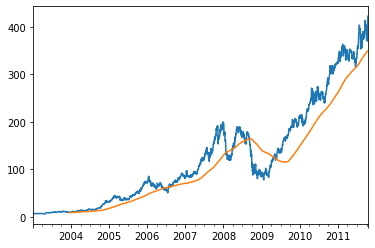

In [9]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [10]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

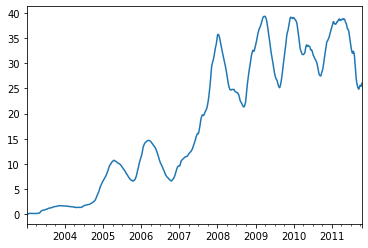

In [11]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [12]:
expanding_mean = appl_std250.expanding().mean()

In [13]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

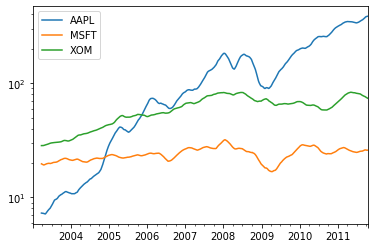

In [14]:
close_px.rolling(60).mean().plot(logy=True)

In [15]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially weighted functions

In [52]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

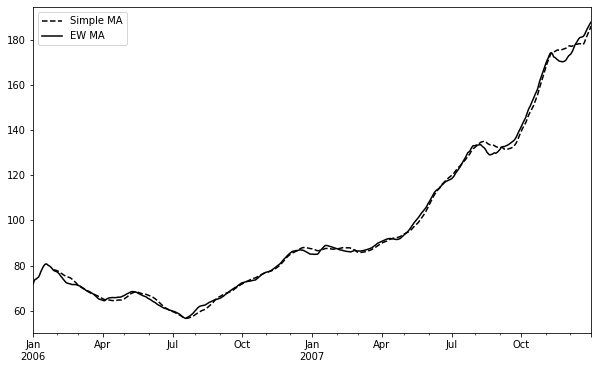

In [53]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary moving window functions

In [54]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [55]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

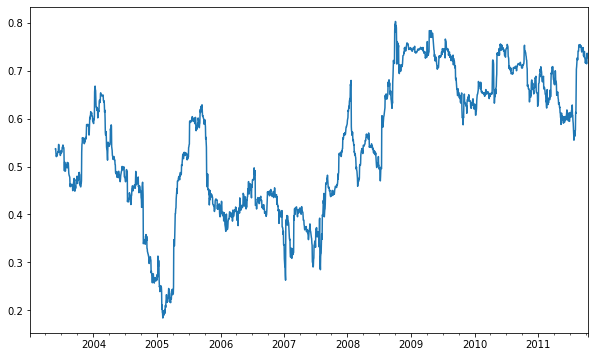

In [56]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [57]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

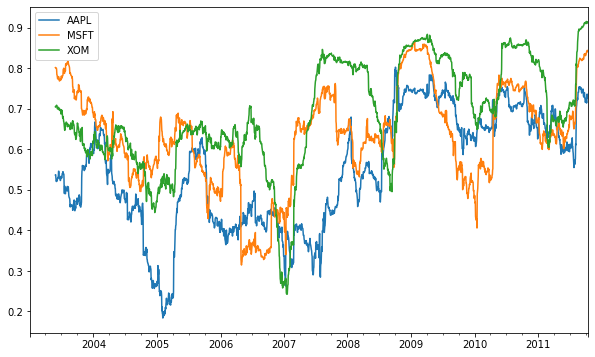

In [58]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-defined moving window functions

In [59]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

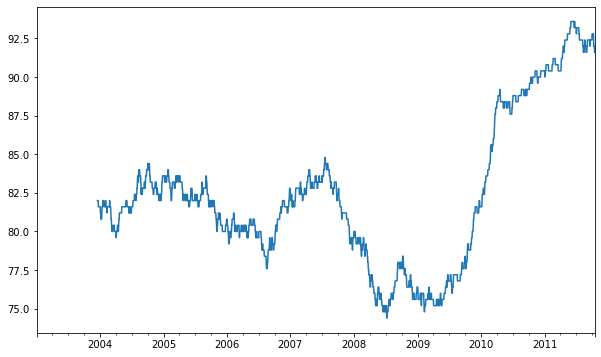

In [60]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent, raw=True)
result.plot()

In [ ]:
def parser(x):
	return datetime.strptime('2010', '%Y')
 
series = pd.read_csv(file, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
resample = series.resample('Y')
volumes2010 = resample.mean()
